<a href="https://colab.research.google.com/github/elenasofia98/PracticalNLP-2023-2024/blob/main/HoL04_2_WordNet%26SentenceSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
!pip install datasets

In [ ]:
from nltk.corpus import wordnet as wn
import pandas as pd
from datasets import load_dataset

dataset = load_dataset("imdb", split={'train':'train', 'test':'test'})

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
})

In [ ]:
dataset['train'][0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [ ]:
# libraries help to clean & normalize texts
# https://www.kaggle.com/code/amustafa4983/sentiment-analysis-on-imdb-movie-reviews/notebook
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag

nltk.download('stopwords')
nltk.download('punkt')

def remove_punctuation(text):
    table = str.maketrans('','',string.punctuation)
    words = text.split()
    filtered_sentence = ''
    for word in words:
        word = word.translate(table)
        filtered_sentence = filtered_sentence + word + ' '
    return filtered_sentence

def normalize_text(text):
    text = text.lower()
    # get rid of urls
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # get rid of non words and extra spaces
    text = re.sub('\\W', ' ', text)
    text = re.sub('\n', '', text)
    text = re.sub(' +', ' ', text)
    text = re.sub('^ ', '', text)
    text = re.sub(' $', '', text)
    return text

def clean_text(text):
    text = text.lower()
    text = text.replace(',',' , ')
    text = text.replace('.',' . ')
    text = text.replace('/',' / ')
    text = text.replace('@',' @ ')
    text = text.replace('#',' # ')
    text = text.replace('?',' ? ')
    text = normalize_text(text)
    text = remove_punctuation(text)
    return text

def clean(example):
    example['cltext'] = clean_text(example['text'])
    return example

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import random

random.seed(42)
train_idx = random.sample(range(len(dataset['train'])), 10000)
test_idx = random.sample(range(len(dataset['test'])), 2000)

In [ ]:
dataset['train'] = dataset['train'].select(train_idx)
dataset['test'] = dataset['test'].select(test_idx)

dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
for split in ['train', 'test']:
    dataset[split] = dataset[split].map(clean)

In [ ]:
dataset['train'][0]

{'text': 'Arguably this is a very good "sequel", better than the first live action film 101 Dalmatians. It has good dogs, good actors, good jokes and all right slapstick! <br /><br />Cruella DeVil, who has had some rather major therapy, is now a lover of dogs and very kind to them. Many, including Chloe Simon, owner of one of the dogs that Cruella once tried to kill, do not believe this. Others, like Kevin Shepherd (owner of 2nd Chance Dog Shelter) believe that she has changed. <br /><br />Meanwhile, Dipstick, with his mate, have given birth to three cute dalmatian puppies! Little Dipper, Domino and Oddball...<br /><br />Starring Eric Idle as Waddlesworth (the hilarious macaw), Glenn Close as Cruella herself and Gerard Depardieu as Le Pelt (another baddie, the name should give a clue), this is a good family film with excitement and lots more!! One downfall of this film is that is has a lot of painful slapstick, but not quite as excessive as the last film. This is also funnier than the 

In [ ]:
for split in ['train', 'test']:
    positive = 0
    for example in dataset[split]:
        positive += example['label']

    print('% of positive examples per split -->', split, positive/len(dataset[split]))

% of positive examples per split --> train 0.5031
% of positive examples per split --> test 0.4945


In [ ]:
# for each synset, associate the number of times it appears in a posive sentence and the number of times it appears in a negative one, make the ratio

In [ ]:
nltk.download('averaged_perceptron_tagger')

def postag(example):
    text = example['cltext']
    tokens = nltk.word_tokenize(text)
    example['tokens'] = tokens
    example['pos'] = [p for (w,p) in nltk.pos_tag(tokens)]
    return example

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Below is the pos tag list of nltk as follows. There is a multiple tag list available in nltk, tag list showing in output as per word.



* CC: It is the conjunction of coordinating
* CD: It is a digit of cardinal
* DT: It is the determiner
* EX: Existential
* FW: It is a foreign word
* IN: Preposition and conjunction
* **JJ: Adjective**
* **JJR and JJS: Adjective and superlative**
* LS: List marker
* MD: Modal
* **NN: Singular noun**
* **NNS, NNP, NNPS: Proper and plural noun**
* PDT: Predeterminer
* WRB: Adverb of wh
* WP: Possessive wh
* WP: Pronoun of wh
* WDT: Determiner of wp
* **VBZ: Verb**
* **VBP, VBN, VBG, VBD, VB: Forms of verbs**
* UH: Interjection
* TO: To go
* RP: Particle
* RBS, RB, RBR: Adverb
* PRP, PRP: Pronoun personal and professional

In [ ]:
for split in ['train', 'test']:
    dataset[split] = dataset[split].map(postag)

In [ ]:
synsets = {}

pos_map = {
    'JJ': ['a', 's'],
    'JJR': ['a', 's'],
    'JJS': ['a', 's'],
    'VBZ': ['v'],
    'NN': ['v'],
    'NNS' : ['v'],
    'NNP': ['v'],
    'NNPS': ['v'],
    'VBP' :  ['v'],
    'VBN' :  ['v'],
    'VBG' :  ['v'],
    'VBD' :  ['v'],
    'VB':  ['v'],
}


def add_synset(synsets, example):
    for i in range(len(example['pos'])):
        pt = example['pos'][i]
        if pt not in pos_map:
            continue
        word = example['tokens'][i]
        word_synsets = []
        for wn_pt in pos_map[pt]:
            for word_synset in wn.synsets(word, pos=wn_pt):
                if word_synset.name() not in synsets:
                    synsets[word_synset.name()] = {0:0, 1:0}
                synsets[word_synset.name()][example['label']] +=1
    return synsets


from tqdm import tqdm
def create_synset(dataset_split):
    synsets = {}
    for example in tqdm(dataset['train']):
        synsets = add_synset(synsets, example)
    return synsets

synsets = create_synset(dataset['train'])

100%|██████████| 10000/10000 [00:53<00:00, 186.69it/s]


In [ ]:
synset_sentiment = {synname: 1 if synsets[synname][1]>synsets[synname][0] else 0 for synname in synsets}

In [ ]:
preds = []
for example in tqdm(dataset['train']):
    score = 0
    example_syns = add_synset({}, example)
    example_syns = list(example_syns.keys())
    positive_score = 0
    negative_score = 0
    for example_syn in example_syns:
        if synset_sentiment[example_syn] == 1:
            positive_score+=1
        else:
            negative_score+=1

    if positive_score > negative_score:
        preds.append(1)
    else:
        preds.append(0)

100%|██████████| 10000/10000 [00:31<00:00, 317.38it/s]


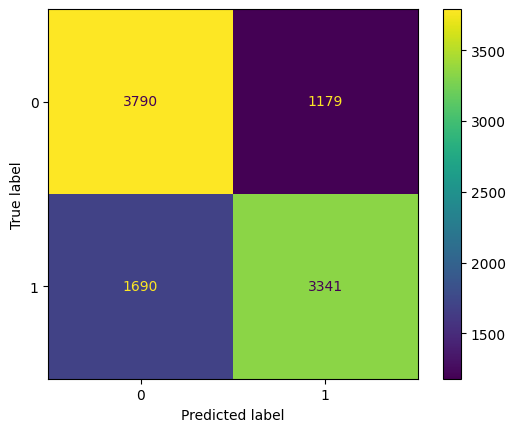

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(dataset['train']['label'], preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

In [ ]:
print(classification_report(y_pred=preds, y_true=dataset['train']['label']))

              precision    recall  f1-score   support

           0       0.69      0.76      0.73      4969
           1       0.74      0.66      0.70      5031

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [ ]:
preds = []
for example in tqdm(dataset['test']):

    example_syns = add_synset({}, example)
    example_syns = list(example_syns.keys())
    positive_score = 0
    negative_score = 0
    for example_syn in example_syns:
        if example_syn in synset_sentiment:
            if synset_sentiment[example_syn] == 1:
                positive_score+=1
            else:
                negative_score+=1

    if positive_score > negative_score:
        preds.append(1)
    else:
        preds.append(0)

100%|██████████| 2000/2000 [00:09<00:00, 209.24it/s]


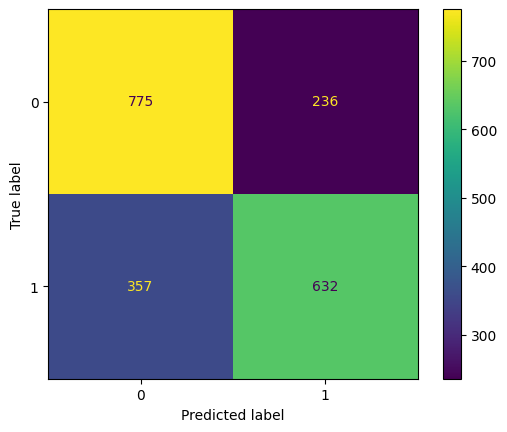

In [ ]:
cm = confusion_matrix(dataset['test']['label'], preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

In [ ]:
print(classification_report(y_pred=preds, y_true=dataset['test']['label']))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72      1011
           1       0.73      0.64      0.68       989

    accuracy                           0.70      2000
   macro avg       0.71      0.70      0.70      2000
weighted avg       0.71      0.70      0.70      2000



In [ ]:
# NB
print(len(synset_sentiment.keys()))

18322


In [ ]:
dataset['train']

Dataset({
    features: ['text', 'label', 'cltext', 'tokens', 'pos'],
    num_rows: 10000
})

In [ ]:
tokens = set()
for toks in dataset['train']['tokens']:
    for tok in toks:
        tokens.add(tok)

In [ ]:
len(tokens)

51606